# Moving Average model

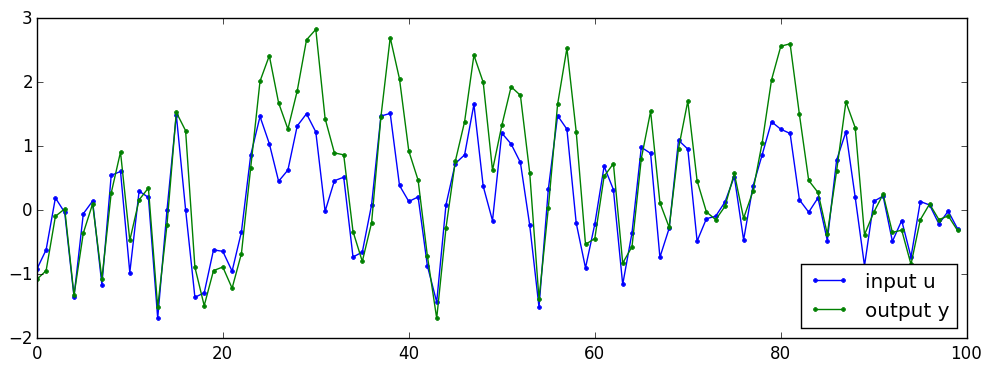

In [4]:
# Load the data file (ref: Boyd/263)
raw = readcsv("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

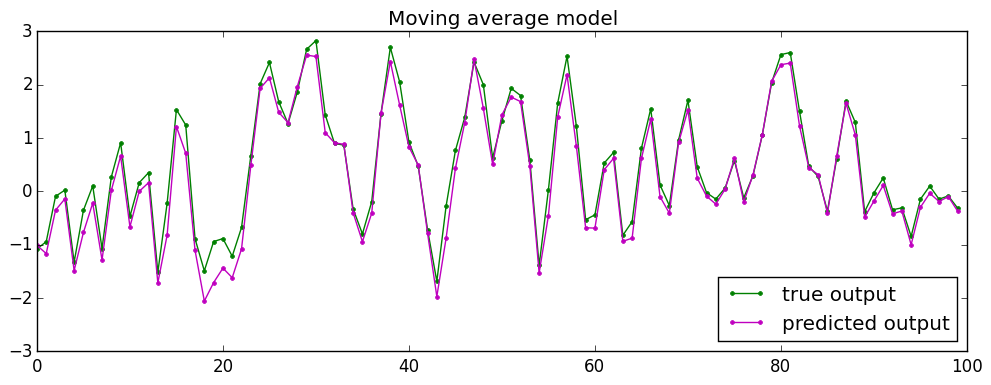

2.460854388269911


In [5]:
# generate A matrix. Using more width creates better fit.  (MA model)
width = 5
A = zeros(T,width)
for i = 1:width
    A[i:end,i] = u[1:end-i+1]
end
wopt = A\y
yest = A*wopt

figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");
println()
println(norm(yest-y))

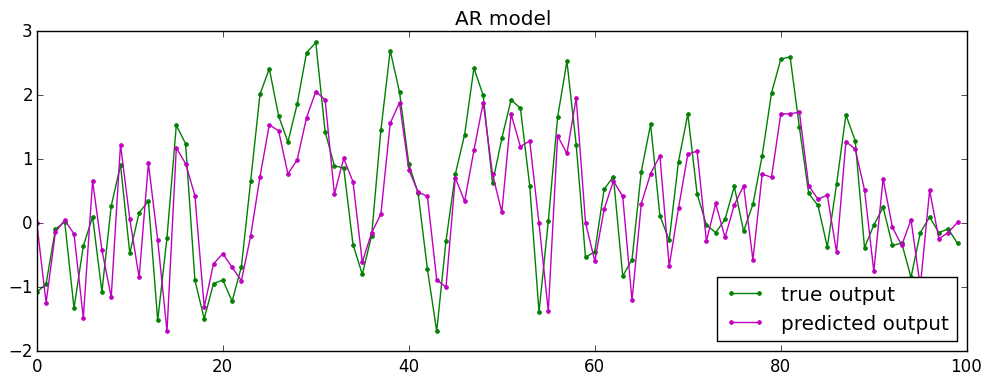


7.436691765656793


In [6]:
# generate A matrix. Using more width creates better fit.  (AR model)
width = 5
A = zeros(T,width)
for i = 1:width
    A[i+1:end,i] = y[1:end-i]
end
wopt = A\y
yest = A*wopt

figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("AR model");
println()
println(norm(y-yest))

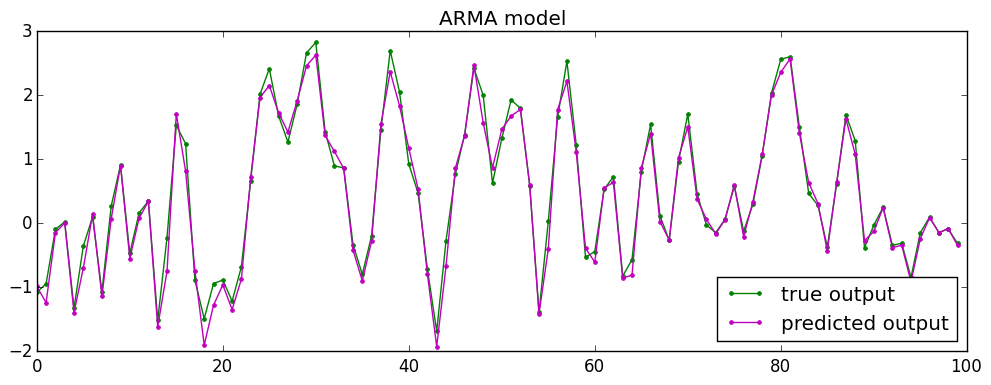


1.7048378291684645


In [7]:
# generate A matrix. Using more width creates better fit.  (ARMA model)
w1 = 2; w2 = 2;
A = zeros(T,w1+w2)
for i = 1:w1
    A[i:end,i] = u[1:end-i+1]
end
for i = 1:w2
    A[i+1:end,w1+i] = y[1:end-i]
end
wopt = A\y
yest = A*wopt

figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("ARMA model");
println()
println(norm(y-yest))

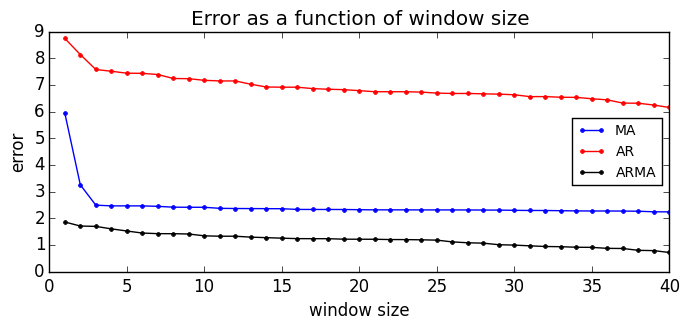

In [33]:
# compute the error that the moving average model makes
MaxWidth = 40
errMA = zeros(MaxWidth)
errAR = zeros(MaxWidth)
errARMA = zeros(MaxWidth)
for width = 1:MaxWidth
    AMA = zeros(T,width)
    AAR = zeros(T,width)
    for i = 1:width
        AMA[i:end,i] = u[1:end-i+1]
        AAR[i+1:end,i] = y[1:end-i]
    end
    wMA = AMA\y
    wAR = AAR\y
    wARMA = [AMA AAR]\y
    yMAest = AMA*wMA
    yARest = AAR*wAR
    yARMAest = [AMA AAR]*wARMA
    errMA[width] = norm(y-yMAest)
    errAR[width] = norm(y-yARest)
    errARMA[width] = norm(y-yARMAest)
end
figure(figsize=(8,3))
title("Error as a function of window size")
plot(1:MaxWidth,errMA,"b.-")
plot(1:MaxWidth,errAR,"r.-")
plot(1:MaxWidth,errARMA,"k.-")
xlabel("window size")
ylabel("error")
legend(["MA","AR","ARMA"],loc="right",fontsize=10)
;